# Analyze GIFnet DRN model

Analysis of simulations in which an EPSC-like stimulus is applied to DRN 5HT and SOM models. Here I use the AugmentedGIF (aka KGIF) for 5HT cells and vanilla GIF for SOM neurons. Depending on the simulation, various methods are used to set the parameters for 5HT neuron models.

In all cases, the SOM->5HT IPSC is modelled as a current (rather than a conductance).

## Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/Thesis/Experiments/GIF fitting/GIF fitting project/GIFFittingToolbox


In [2]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pandas as pd

from src.GIF_network import PSTH

%config InlineBackend.figure_format ='retina'

## Load models and data

In [3]:
MOD_PATH = os.path.join('data', 'models', 'GIF_network')

mod_fnames = {
    'median': 'median_gifs.mod',
    'manual': 'sergif_manual.mod',
    'noIA': 'sergif_noIA.mod'
}
mods = {}

for key, fname in mod_fnames.iteritems():
    with open(os.path.join(MOD_PATH, fname), 'rb') as f:
        mods[key] = pickle.load(f)
        f.close()

In [4]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')

dat_fnames = {
    'median': 'median_gifs.dat', # Parameters set automatically.
    'manual': 'sergif_manual.dat', # SerGIF parameters tweaked manually.
    'noIA': 'sergif_noIA.dat' # Same as sergif_manual but with IA removed.
}
dat = {}

for key, fname in dat_fnames.iteritems():
    with open(os.path.join(DATA_PATH, fname), 'rb') as f:
        dat[key] = pickle.load(f)
        f.close()

In [5]:
dat['median'].head()

,Scale,Inhibition,Input,ser spks,ser ex,gaba ex
0,0.010000,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
1,0.010000,reg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
2,0.023571,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
3,0.023571,reg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."
4,0.037143,ib,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{u'v_T': [-52.383328508571815, -52.38332850857...","{u'v_T': [-61.533701879440926, -61.53370187944..."


Simulation output is stored as a `pd.DataFrame` with `Scale` (input stimulus amplitude) and `Inhibition` (`reg` is control, `ib` means no feed-forward inhibition) columns describing the experimental condition. `ser ex` and `gaba ex` columns contain sample traces from neurons embedded in the network; only one sample trace is saved per simulation. Different dataframes in `dat` correspond to batches of simulations from different `GIFnet` objects. In this case, only the method used to set 5HT GIF parameters differs between `GIFnet` objects.

In [6]:
def closest(x, val):
    """Return a boolean mask of x set to True at *all* x \approx argmin|x-val|.
    
    Can be combined with other boolean masks to filter list-like objects.
    """
    return np.isclose(x, x[np.argmin(np.abs(x - val))])

### Sample trace

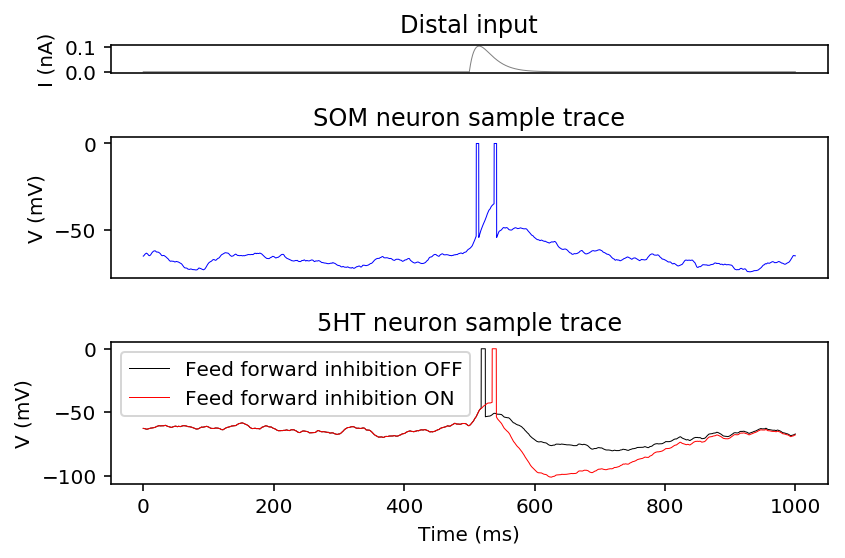

In [10]:
gifnet_df = dat['manual']
sample_scale = 0.15

plt.figure()

sample_tr_spec = gs.GridSpec(3, 1, height_ratios = [0.2, 1, 1])

plt.subplot(sample_tr_spec[0, :])
plt.title('Distal input')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'Input'
    ].values[0], 
    '-', color = 'gray', lw = 0.5
)
plt.xticks([])
plt.ylabel('I (nA)')

plt.subplot(sample_tr_spec[1, :])
plt.title('SOM neuron sample trace')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'gaba ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'gaba ex'
    ].values[0]['V'], 
    'b-', lw = 0.5
)
plt.xticks([])
plt.ylabel('V (mV)')

plt.subplot(sample_tr_spec[2, :])
plt.title('5HT neuron sample trace')
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'reg'), 'ser ex'
    ].values[0]['V'], 
    'k-', lw = 0.5,
    label = 'Feed forward inhibition OFF'
)
plt.plot(
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'ib'), 'ser ex'
    ].values[0]['t'],
    gifnet_df.loc[
        np.logical_and(closest(gifnet_df['Scale'], 0.1), gifnet_df['Inhibition'] == 'ib'), 'ser ex'
    ].values[0]['V'], 
    'r-', lw = 0.5,
    label = 'Feed forward inhibition ON'
)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.legend()

plt.tight_layout()

plt.show()

In [8]:
psth_width = 10.

psth_dict = {}

for key in dat.keys():
    
    # Allocate structures to hold output.
    psth_tmp = np.empty(
        (2, dat[key].loc[0, 'ser spks'].shape[0], len(np.unique(dat[key]['Scale']))),
        dtype = np.float64
    )
    scales_tmp = [[], []]
    
    # Pre-extract dataframes for data with and without ff ib
    dfs_tmp = {
        cond: dat[key].loc[dat[key]['Inhibition'] == cond, :].reset_index() for cond in ('reg', 'ib')
    }
    
    # Compute PSTH and extract input scale.
    for i in range(psth_tmp.shape[2]):
        for j, cond in enumerate(['reg', 'ib']):
            psth_tmp[j, :, i] = PSTH(
                dfs_tmp[cond].loc[i, 'ser spks'],
                psth_width, mods[key].no_ser_neurons
            )
            
            scales_tmp[j].append(
                dfs_tmp[cond].loc[i, 'Scale']
            )
    
    # Format checks.
    assert len(scales_tmp) == 2
    assert len(scales_tmp[0]) == len(scales_tmp[1])
    
    # Save output.
    psth_dict[key] = {
        'psth': psth_tmp,
        'scales': scales_tmp
    }
    
# Delete tmp variables
del psth_tmp, scales_tmp, dfs_tmp

## Analyze PSTH

The goal of these experiments is to understand how feed-forward inhibition interacts with IA in 5HT cells to filter common inputs. To that end, here we extract the PSTH of 5HT cells and compare them with and without feed-forward inhibition under various conditions.

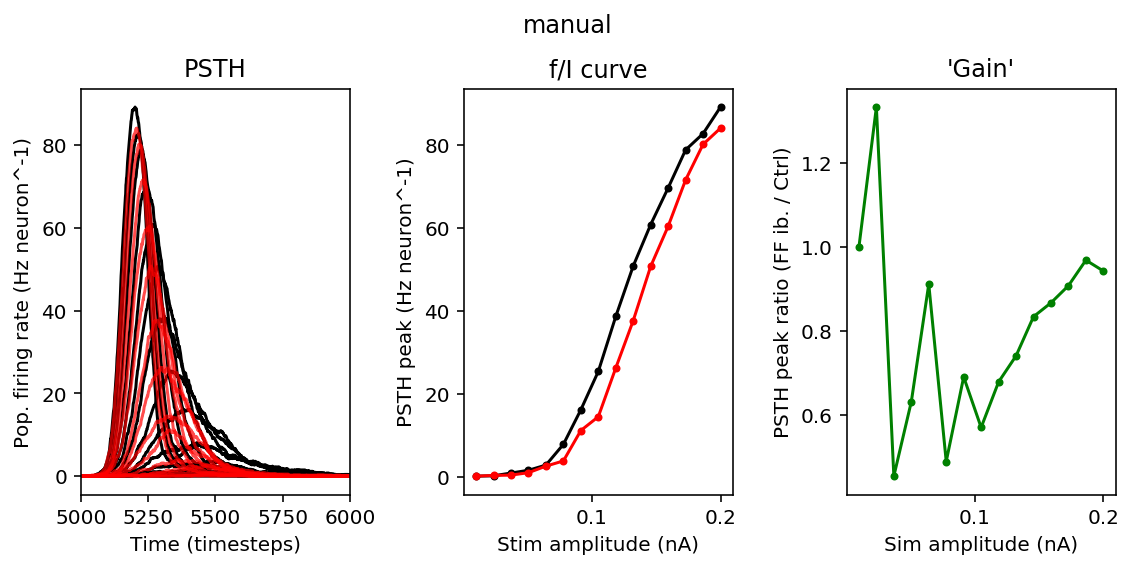

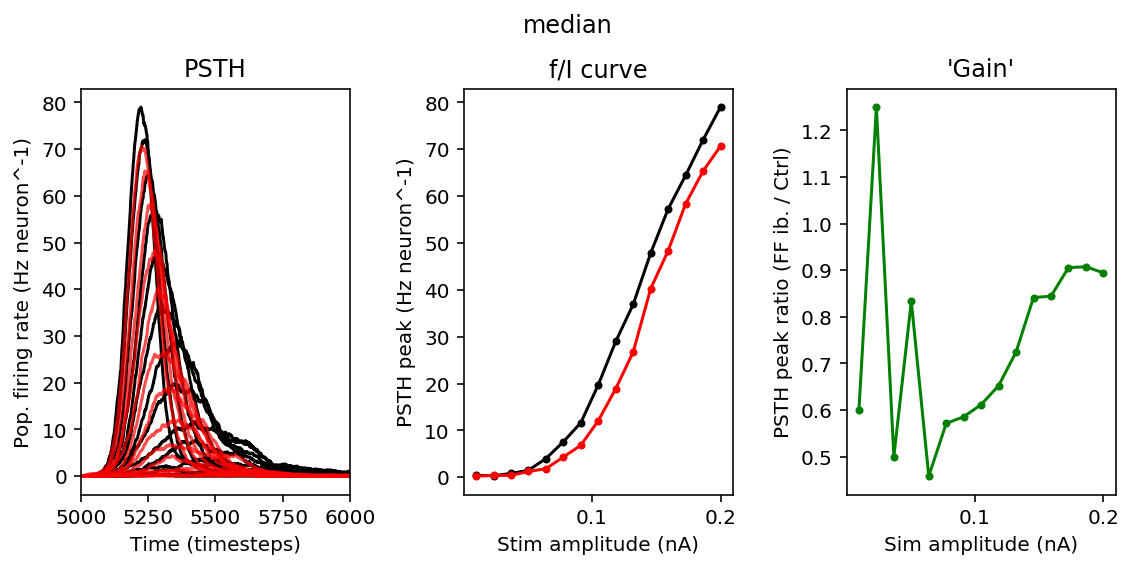

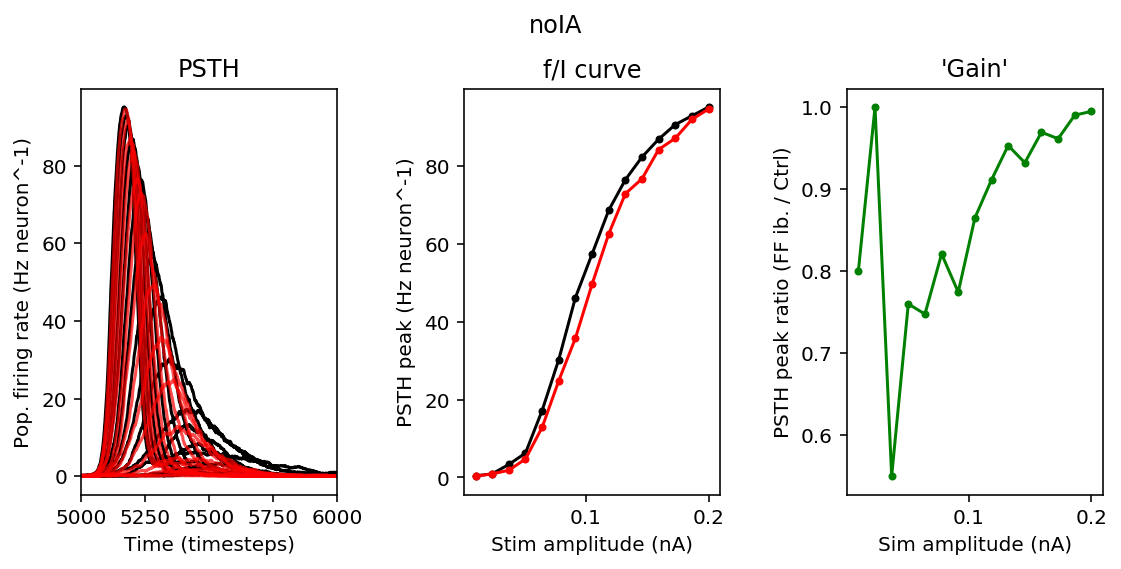

In [9]:
for key, innerdict in psth_dict.iteritems():
    plt.figure(figsize = (8, 4))
    
    plt.suptitle(key)
    
    plt.subplot(131)
    plt.title('PSTH')
    plt.plot(1e3 * innerdict['psth'][0, :, :], 'k-', label = 'Ctrl')
    plt.plot(1e3 * innerdict['psth'][1, :, :], 'r-', alpha = 0.7, label = 'FF ib.')
    plt.xlim(5000, 6000)
    plt.xlabel('Time (timesteps)')
    plt.ylabel('Pop. firing rate (Hz neuron^-1)')
    
    plt.subplot(132)
    plt.title('f/I curve')
    plt.plot(innerdict['scales'][0], 1e3 * innerdict['psth'][0, :, :].max(axis=0), 'k.-', label = 'Ctrl')
    plt.plot(innerdict['scales'][1], 1e3 * innerdict['psth'][1, :, :].max(axis=0), 'r.-', label = 'FF ib.')
    plt.xlabel('Stim amplitude (nA)')
    plt.ylabel('PSTH peak (Hz neuron^-1)')
    
    plt.subplot(133)
    plt.title("'Gain'")
    plt.plot(
        innerdict['scales'][0], 
        innerdict['psth'][1, :, :].max(axis=0) / innerdict['psth'][0, :, :].max(axis=0),
        'g.-'
    )
    plt.xlabel('Sim amplitude (nA)')
    plt.ylabel('PSTH peak ratio (FF ib. / Ctrl)')
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.85)
    
    plt.show()

Left panel shows population firing rate of 5HT cells with feed-forward connections severed in black (`reg`) and with feed-forward inhibition in red (`ib`). In the middle panel we see that feed-forward inhibition (red) reduces the height of the PSTH peak, but only by a very small amount if IA is knocked out. In the right panel, we see the ratio of PSTH heights with and without feed-forward inhibition across stimulus amplitudes. If feed-forward inhibition implements a gain modulation function, this line should be more or less flat. Instead, we find that the fractional inhibition decreases with increasing stimulus strength, more consistent with subtractive than divisive inhibition.

## Summary

Knocking out IA seems to reduce the effect of feed-forward inhibition on PSTH peak, consistent with the idea that IA shifts the effect of feed-forward inhibition towards one of offset or gain and away from one of synchrony modulation.

Based on these results, the effect of feed-forward GABA-ergic connections is more consistent with subtractive inhibition (offset) than divisive inhibition (gain). However, this might be different for fluctuating *in vivo*-like inputs, or with a more realistic conductance-based IPSC model.

### Next steps

- Retry with conductance-based IPSC model.
- Retry with OU noise input.